In [22]:
import requests
from bs4 import BeautifulSoup as bs  
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [39]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"
### Extracting reviews from Amazon website ################
for i in range(1,100):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews



### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [40]:
iphone_snapdeal

['offer product is available, customer care also good',
 'vry gud phn to use',
 'The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang',
 "I am an apple user...hence wanted to buy it for my wife's birthday as well...got the fone in a perfect condition....great looks....brand new....sealed....thank u snapdeal for the best price...just loved it",
 "It's a dream come true after switching over from my iPhone 4. Really worth buying app

In [43]:
ip_rev_string = " ".join(iphone_snapdeal)
ip_rev_string

'offer product is available, customer care also good vry gud phn to use The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang I am an apple user...hence wanted to buy it for my wife\'s birthday as well...got the fone in a perfect condition....great looks....brand new....sealed....thank u snapdeal for the best price...just loved it It\'s a dream come true after switching over from my iPhone 4. Really worth buying apple products Awe

In [44]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [45]:
ip_rev_string

'offer product is available customer care also good vry gud phn to use the phone is ok just a small scratch was found on the panel nothing wrong was noticed with the software or battery the battery life is good for a day or two if the wifi and packet data is turned off from time to time have not tried any games but about hours of wifi can easily be handled by the phone without getting discharged another hours sound quality and camera is very good camera has retina display and a flash which makes it even better than the s camera c in particular is not as expensive as a s or a s making it much more affordable at the same time a fast smartphone that does not hang i am an apple user hence wanted to buy it for my wife s birthday as well got the fone in a perfect condition great looks brand new sealed thank u snapdeal for the best price just loved it it s a dream come true after switching over from my iphone really worth buying apple products awesome piece awesome experience finally able to 

In [46]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
len(ip_reviews_words)

9277

In [48]:
with open("D:\ms\stop.txt","r") as sw:
    stopwords=sw.read()


In [49]:
stopwords

'a\nabout\nabove\nacross\nafter\nagain\nagainst\nall\nalmost\nalone\nalong\nalready\nalso\nalthough\nalways\namong\nan\nand\nanother\nany\nanybody\nanyone\nanything\nanywhere\nare\narea\nareas\naround\nas\nask\nasked\nasking\nasks\nat\naway\nb\nback\nbacked\nbacking\nbacks\nbe\nbecame\nbecause\nbecome\nbecomes\nbeen\nbefore\nbegan\nbehind\nbeing\nbeings\nbest\nbetter\nbetween\nbig\nboth\nbut\nby\nc\ncame\ncan\ncannot\ncase\ncases\ncertain\ncertainly\nclear\nclearly\ncome\ncould\nd\ndid\ndiffer\ndifferent\ndifferently\ndo\ndoes\ndone\ndown\ndown\ndowned\ndowning\ndowns\nduring\ne\neach\nearly\neither\nend\nended\nending\nends\nenough\neven\nevenly\never\nevery\neverybody\neveryone\neverything\neverywhere\nf\nface\nfaces\nfact\nfacts\nfar\nfelt\nfew\nfind\nfinds\nfirst\nfor\nfour\nfrom\nfull\nfully\nfurther\nfurthered\nfurthering\nfurthers\ng\ngave\ngeneral\ngenerally\nget\ngets\ngive\ngiven\ngives\ngo\ngoing\ngood\ngoods\ngot\ngreat\ngreater\ngreatest\ngroup\ngrouped\ngrouping\ngroups\n

In [50]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]
len(ip_reviews_words)

3933

In [51]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)
ip_rev_string

'offer product available customer care vry gud phn phone scratch found panel wrong noticed software battery battery life wifi packet data time time tried games hours wifi easily handled phone getting discharged hours sound quality camera camera retina display flash makes camera particular expensive affordable time fast smartphone hang apple user hence buy wife birthday fone perfect condition looks brand sealed thank snapdeal price loved dream true switching iphone worth buying apple products awesome piece awesome experience finally able bought device worth buying deal recommend excellent phone gud price deal snapdeal nice phone courier service days amazing buy guys using month hang product android app android truecaller etc due secure platform able connect companies phone using bluetooth hard initially hard time video doc stored music stored using itunes butter smooth rouch wont stop fingering buy fall love price looks awesome awesome battery recommended nice features phone amazing wor

In [52]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

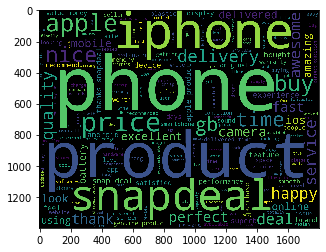

In [55]:
plt.imshow(wordcloud_ip)
plt.show()

In [61]:
# positive words # Choose the path for +ve words stored in system
with open("D:\ms\positive_words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [62]:
poswords

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [64]:
# negative words  Choose path for -ve words stored in system
with open("D:\\ms\\negative_words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [65]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

In [66]:
ip_neg_in_neg

'scratch wrong expensive hang hang hard hard fall lagging wrong regret complaints trouble worry overpriced faulty falls reluctant crazy anxiety incomparable funky cons cheap hang hang damage damage poor doubt damage burning complaints cons confuse cheap hang rumours lags hard disappointing scratches issues slow sluggish bad miss useless cons issue killer difficulty dislike lacks regrets scratches damage freezes missed hard worried costly worried scare lags concerned complicated issue overpriced bad fake worried issue lag overpriced hangs cons cheap flaw hang pathetic lags lags bad toll doubt costly lags cons issue flaws lacks issue unbelievable crazy overlook hang pinch limitation hassles negative junk weak reluctant crazy cheap cons bad issues disappointed slow limit fake damage rumours issue cheap fragile difficulties drain hangs lagging wasted cons cons issue unexpected fears unbelievable poor slow pathetic issue fraudulent cheap'

In [67]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

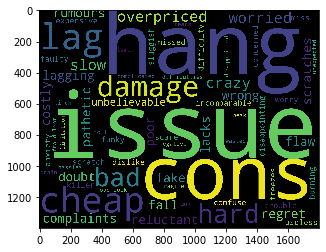

In [69]:
plt.imshow(wordcloud_neg_in_neg)
plt.show()

In [74]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
ip_pos_in_pos

'available affordable fast perfect thank loved worth awesome awesome worth recommend excellent nice amazing secure smooth love awesome awesome recommended nice amazing superb cool sexy amazingly fast happy super awesome amazing worth recommended authentic excellent won recommend recommend nice nice liked worth perfect genuine pleased cheaper smartest free awesome fast handy respect happy genuine easy excellent valuable recommended superb promised available boost awsome awesome amazing perfect thank perfect trust recommend fond awesome unmatched amazing superb fast awesome eyecatching won wonder smooth classy pros superb excellent amazing superb crisp fine kudos wonderful beautiful excellent perfect perfect bargain smooth worth excellent smooth flawless pleasant happy pros superb love valuable worth excellent fans cheaper satisfied proper awesome reasonable smooth wow genuine fast recommended fast excellent easy sensitive easy versatile nice amazingly fast nice happy lover pros awesome 

In [71]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

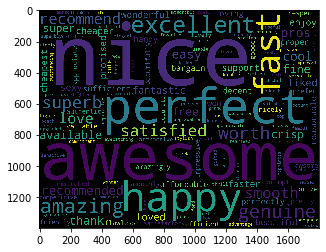

In [73]:
plt.imshow(wordcloud_pos_in_pos)
plt.show()

In [104]:
import pandas as pd
iphone=pd.Series(iphone_snapdeal)

In [105]:
iphone

0      offer product is available, customer care also...
1                                     vry gud phn to use
2      The phone is ok just a small scratch was found...
3      I am an apple user...hence wanted to buy it fo...
4      It's a dream come true after switching over fr...
                             ...                        
433              Very cheap iphone. What else I can say.
434                                     Heating problem.
435                                lovely  fastest super
436    great phone finally at the right price. great ...
437         Marvallous Phone...Ever used....You must buy
Length: 438, dtype: object

In [106]:
df=pd.DataFrame(iphone)

In [107]:
df.head()

,0
0,"offer product is available, customer care also..."
1,vry gud phn to use
2,The phone is ok just a small scratch was found...
3,I am an apple user...hence wanted to buy it fo...
4,It's a dream come true after switching over fr...


In [110]:
df.columns=['reviews']
df.head()

,reviews
0,"offer product is available, customer care also..."
1,vry gud phn to use
2,The phone is ok just a small scratch was found...
3,I am an apple user...hence wanted to buy it fo...
4,It's a dream come true after switching over fr...


In [111]:
from textblob import TextBlob
pol=[]
for i in iphone_snapdeal:
    review = TextBlob(i)
    pol.append(review.sentiment.polarity)

In [112]:
pol

[0.55,
 0.0,
 0.2353846153846154,
 0.9,
 0.32499999999999996,
 1.0,
 0.45,
 1.0,
 0.125,
 0.051388888888888894,
 0.8500000000000001,
 0.78,
 0.46111111111111114,
 0.5231818181818182,
 0.6666666666666666,
 0.1,
 0.9099999999999999,
 0.3888888888888889,
 0.0,
 0.0,
 0.0,
 0.5874999999999999,
 0.6,
 0.6,
 0.19970238095238094,
 0.3,
 1.0,
 0.06666666666666667,
 0.7,
 0.955,
 0.5,
 0.0,
 0.4153030303030303,
 1.0,
 0.7,
 0.7,
 0.5340909090909092,
 0.7999999999999999,
 0.062499999999999986,
 0.5633333333333334,
 0.5347619047619048,
 1.0,
 0.7,
 0.0,
 0.35000000000000003,
 0.7142857142857143,
 1.0,
 0.6000000000000001,
 0.6666666666666666,
 0.31931818181818183,
 0.4158720238095238,
 0.5055555555555555,
 0.85,
 0.55,
 1.0,
 0.1,
 0.43499999999999994,
 0.55,
 1.0,
 0.4,
 0.38645833333333335,
 0.11818181818181818,
 0.23425925925925928,
 0.75,
 1.0,
 0.65,
 0.033333333333333326,
 0.44166666666666665,
 0.0,
 0.0,
 0.63,
 0.0,
 -0.1,
 0.25,
 0.525,
 0.2,
 0.4726666666666667,
 0.34500000000000003,
 0

In [113]:
def sentiment(i):
    if i.sentiment.polarity<0:
        sentiment='negative'
    elif i.sentiment.polarity==0:
        sentiment='neutral'
    else:
        sentiment='positive'

In [114]:
sentiment_polarity=pd.Series(pol)

In [115]:
df['sentiment_polarity']=sentiment_polarity

In [116]:
df.head()

,reviews,sentiment_polarity
0,"offer product is available, customer care also...",0.550000
1,vry gud phn to use,0.000000
2,The phone is ok just a small scratch was found...,0.235385
3,I am an apple user...hence wanted to buy it fo...,0.900000
4,It's a dream come true after switching over fr...,0.325000


In [117]:
df['sentiment']=None

In [118]:
df.head()

,reviews,sentiment_polarity,sentiment
0,"offer product is available, customer care also...",0.550000,None
1,vry gud phn to use,0.000000,None
2,The phone is ok just a small scratch was found...,0.235385,None
3,I am an apple user...hence wanted to buy it fo...,0.900000,None
4,It's a dream come true after switching over fr...,0.325000,None


In [130]:
df.loc[df.sentiment_polarity<0,'sentiment']='negative'
df.loc[df.sentiment_polarity==0,'sentiment']='neutral'
df.loc[df.sentiment_polarity>0,'sentiment']='positive'

In [131]:
df.head()

,reviews,sentiment_polarity,sentiment
0,"offer product is available, customer care also...",0.550000,positive
1,vry gud phn to use,0.000000,neutral
2,The phone is ok just a small scratch was found...,0.235385,positive
3,I am an apple user...hence wanted to buy it fo...,0.900000,positive
4,It's a dream come true after switching over fr...,0.325000,positive


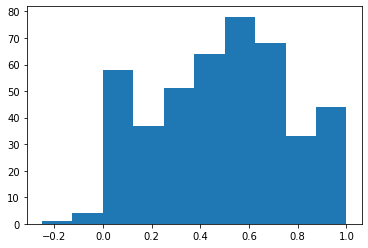

In [132]:
plt.hist(df.sentiment_polarity)
plt.show()

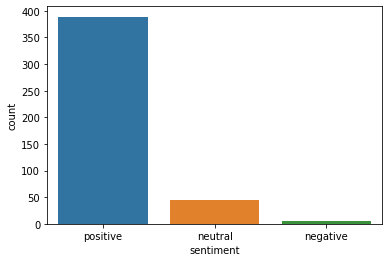

In [133]:
import seaborn as sns
sns.countplot(df.sentiment)
plt.show()

In [137]:
neg = ([df.reviews for i in df.sentiment if i=='negative'])
print(len(neg))
print(neg)

5


In [146]:
neg_without_index=[i[2] for i in neg]
neg_without_index

['The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang',
 'The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and

In [147]:
def listToString(s):
    # initialize an empty string
    str1 = " "
    return (str1.join(s))
neg_string=listToString(neg_without_index)
neg_string

'The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Came

In [148]:
wordcloud_neg = WordCloud(
                      background_color='red',
                      width=1800,
                      height=1400
                     ).generate(neg_string)

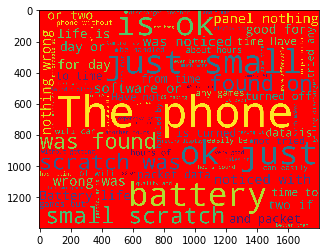

In [149]:
plt.imshow(wordcloud_neg)
plt.show()

In [150]:
pos= ([df.reviews for i in df.sentiment if i=='positive'])
print(len(pos))

389


In [158]:
pos_without_index=[i[2] for i in pos]
pos_without_index

['The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang',
 'The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and

In [160]:
pos_string=listToString(pos_without_index)
pos_string

'The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Came

In [161]:
wordcloud_pos= WordCloud(
                      background_color='green',
                      width=1800,
                      height=1400
                     ).generate(pos_string)

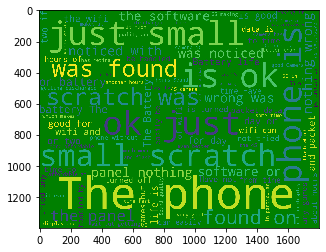

In [162]:
plt.imshow(wordcloud_pos)
plt.show()

In [163]:
neut= ([df.reviews for i in df.sentiment if i=='neutral'])
print(len(neut))

44


In [167]:
neut

[0      offer product is available, customer care also...
 1                                     vry gud phn to use
 2      The phone is ok just a small scratch was found...
 3      I am an apple user...hence wanted to buy it fo...
 4      It's a dream come true after switching over fr...
                              ...                        
 433              Very cheap iphone. What else I can say.
 434                                     Heating problem.
 435                                lovely  fastest super
 436    great phone finally at the right price. great ...
 437         Marvallous Phone...Ever used....You must buy
 Name: reviews, Length: 438, dtype: object,
 0      offer product is available, customer care also...
 1                                     vry gud phn to use
 2      The phone is ok just a small scratch was found...
 3      I am an apple user...hence wanted to buy it fo...
 4      It's a dream come true after switching over fr...
                            

In [165]:
neut_without_index=[i[2] for i in neut]
neut_without_index

['The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang',
 'The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and

In [166]:
neut_string=listToString(neut_without_index)
neut_string

'The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Camera is very good Camera has retina display and a flash which makes it even better than the 4S camera\n\n5C in particular is not as expensive as a 5S or a 6S making it much more affordable at the same time a fast smartphone that does not hang The phone is ok just a small scratch was found on the panel, nothing wrong was noticed with the software or battery\n\nThe Battery life is good for a day or two if the wifi and packet data is turned off from time to time. Have not tried any games but about 8 hours of wifi can easily be handled by the phone without getting discharged another 10 hours. \n\nSound quality and Came

In [168]:
wordcloud_neut= WordCloud(
                      background_color='blue',
                      width=1800,
                      height=1400
                     ).generate(neut_string)

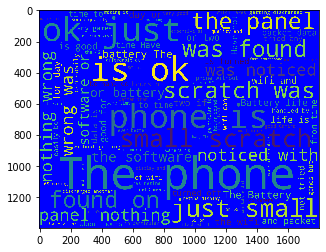

In [169]:
plt.imshow(wordcloud_neut)
plt.show()